<a href="https://colab.research.google.com/github/msufiyanpatel/goldpriceprediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [ ]:

import yfinance as yf

# Get the historical data for gold for the past 12 years
data = yf.download('GC=F', start="2010-01-01", end="2023-06-02")

# Print the first five rows of the DataFrame
print(data.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951  1117.699951   
2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976  1118.099976   
2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024  1135.900024   
2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976  1133.099976   
2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951  1138.199951   

            Volume  
Date                
2010-01-04     184  
2010-01-05      53  
2010-01-06     363  
2010-01-07      56  
2010-01-08      54  


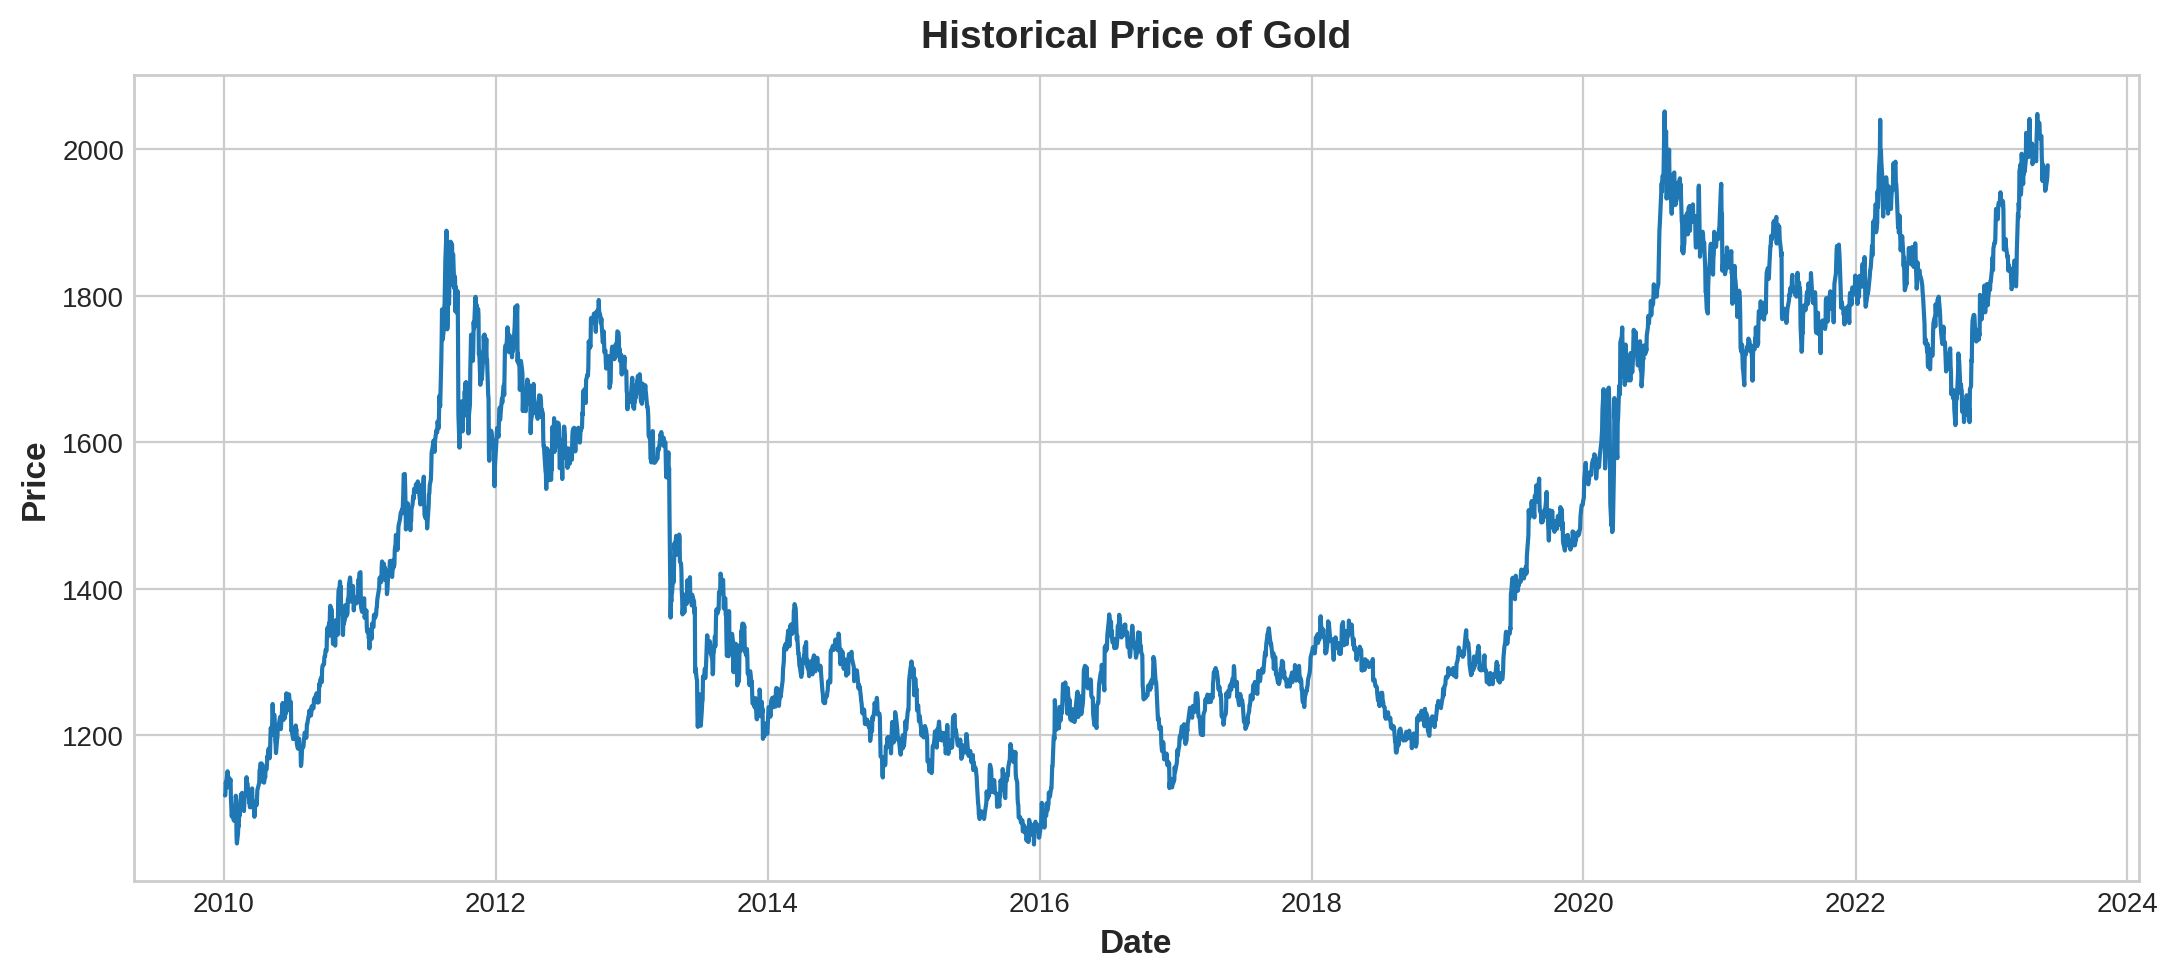

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price of gold
plt.plot(data['Close'])

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Price')

# Set the title
plt.title('Historical Price of Gold')

# Show the plot
plt.show()


In [ ]:
data.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,False,False,False,False,False,False
2010-01-05,False,False,False,False,False,False
2010-01-06,False,False,False,False,False,False
2010-01-07,False,False,False,False,False,False
2010-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-05-25,False,False,False,False,False,False
2023-05-26,False,False,False,False,False,False
2023-05-30,False,False,False,False,False,False


In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# No Null Values

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-25,1943.099976,1943.099976,1943.099976,1943.099976,1943.099976,1
2023-05-26,1948.199951,1948.400024,1944.099976,1944.099976,1944.099976,166036
2023-05-30,1942.699951,1962.599976,1931.000000,1958.000000,1958.000000,37838
2023-05-31,1958.199951,1973.000000,1953.000000,1963.900024,1963.900024,5959
2023-06-01,1963.199951,1983.000000,1954.300049,1978.000000,1978.000000,750


In [ ]:
df = data.copy()

In [ ]:
df['Time'] = np.arange(len(data.index))

In [ ]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30',
               '2023-05-31', '2023-06-01'],
              dtype='datetime64[ns]', name='Date', length=3375, freq=None)

In [ ]:
df = df.assign(date=df.index)


In [ ]:
df.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Time                  int64
date         datetime64[ns]
dtype: object

In [ ]:
df = df.astype(object)


In [ ]:
df.dtypes

Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
Time         object
date         object
dtype: object

In [ ]:
features = ['Time', 'Open', 'High', 'Low', 'Volume']

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,date
Date,,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,0,2010-01-04 00:00:00
2010-01-05,1118.099976,1126.5,1115.0,1118.099976,1118.099976,53,1,2010-01-05 00:00:00
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363,2,2010-01-06 00:00:00
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56,3,2010-01-07 00:00:00
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4,2010-01-08 00:00:00


In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df[features]
y = df.Close  # target

# Train the model
model = LinearRegression()
model.fit(X, y)


y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
import matplotlib.pyplot as plt

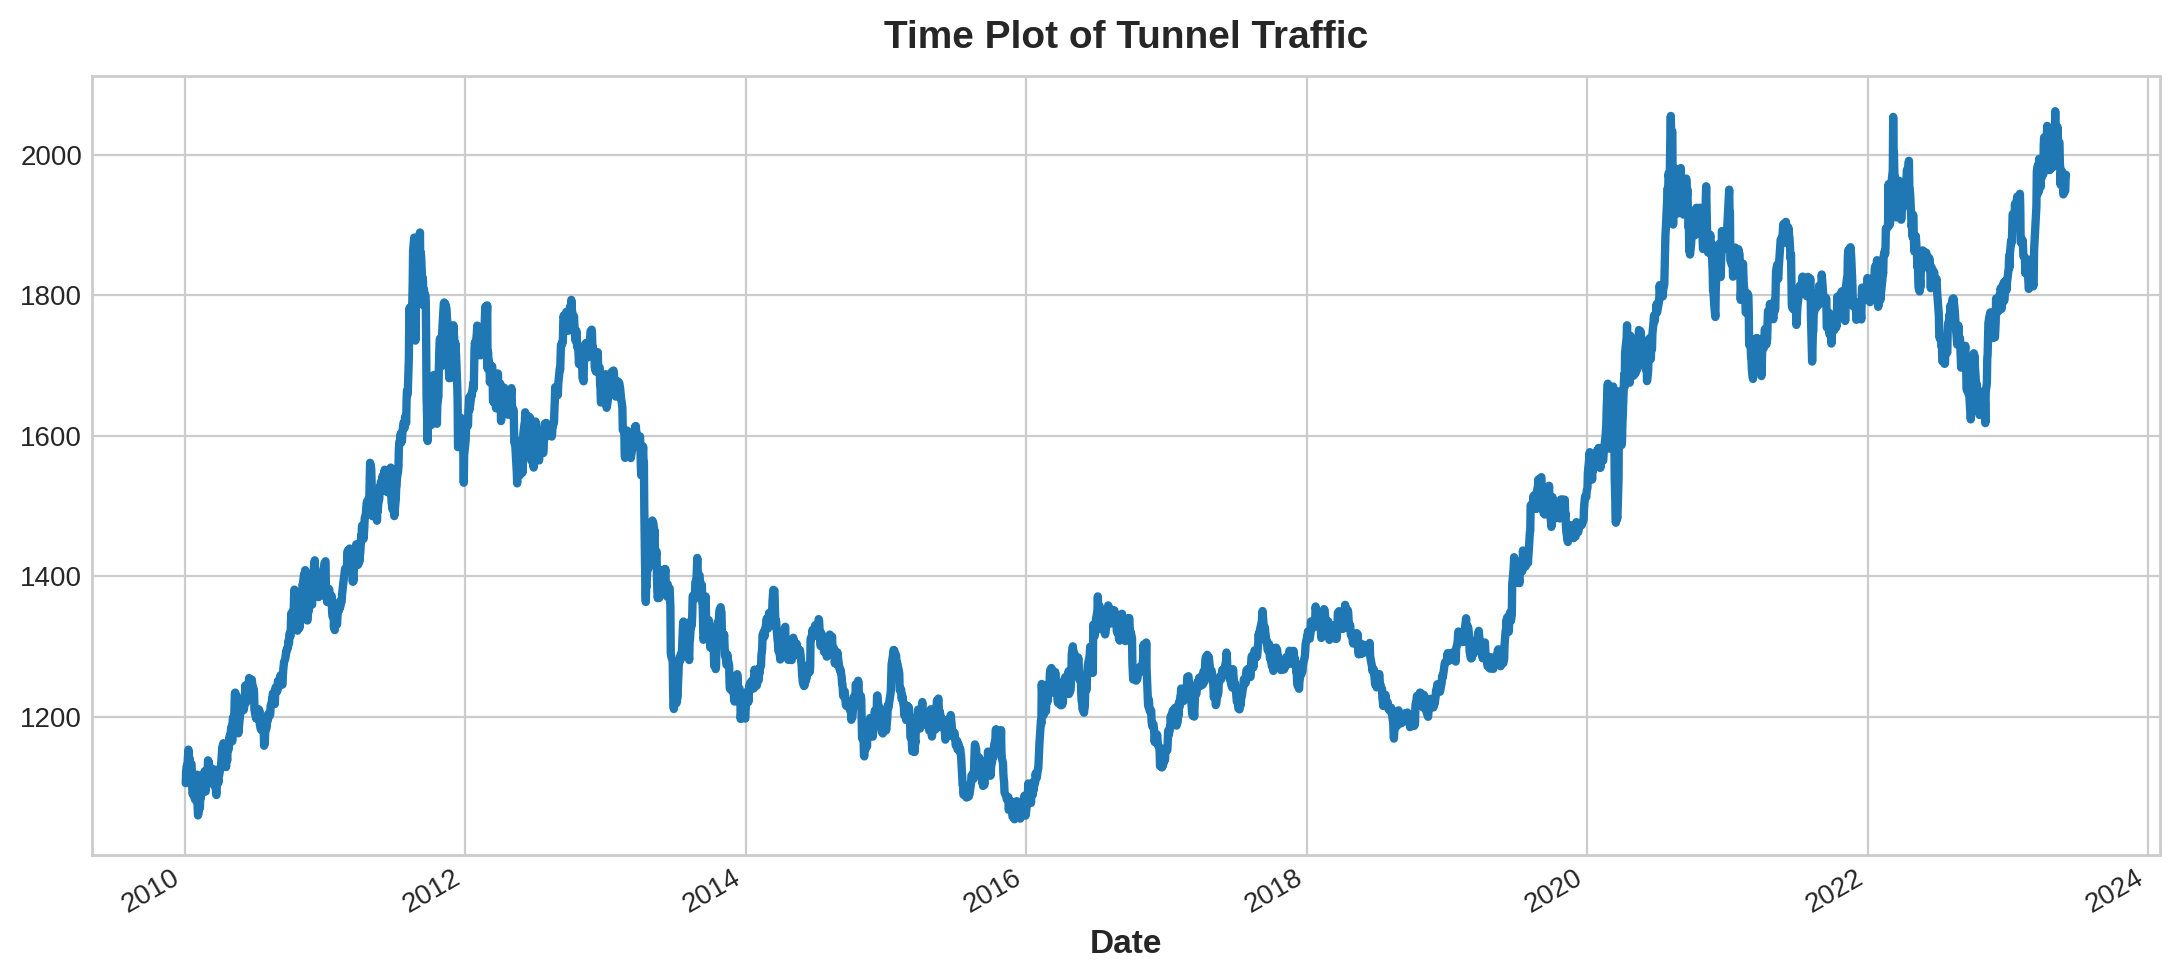

In [ ]:
ax = plt.gca()

ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');




In [ ]:
df['Lag_1'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,date,Lag_1
Date,,,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,0,2010-01-04 00:00:00,None
2010-01-05,1118.099976,1126.5,1115.0,1118.099976,1118.099976,53,1,2010-01-05 00:00:00,1117.699951
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363,2,2010-01-06 00:00:00,1118.099976
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56,3,2010-01-07 00:00:00,1135.900024
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4,2010-01-08 00:00:00,1133.099976


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  
y = df.loc[:, 'Close']  
y, X = y.align(X, join='inner')  

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

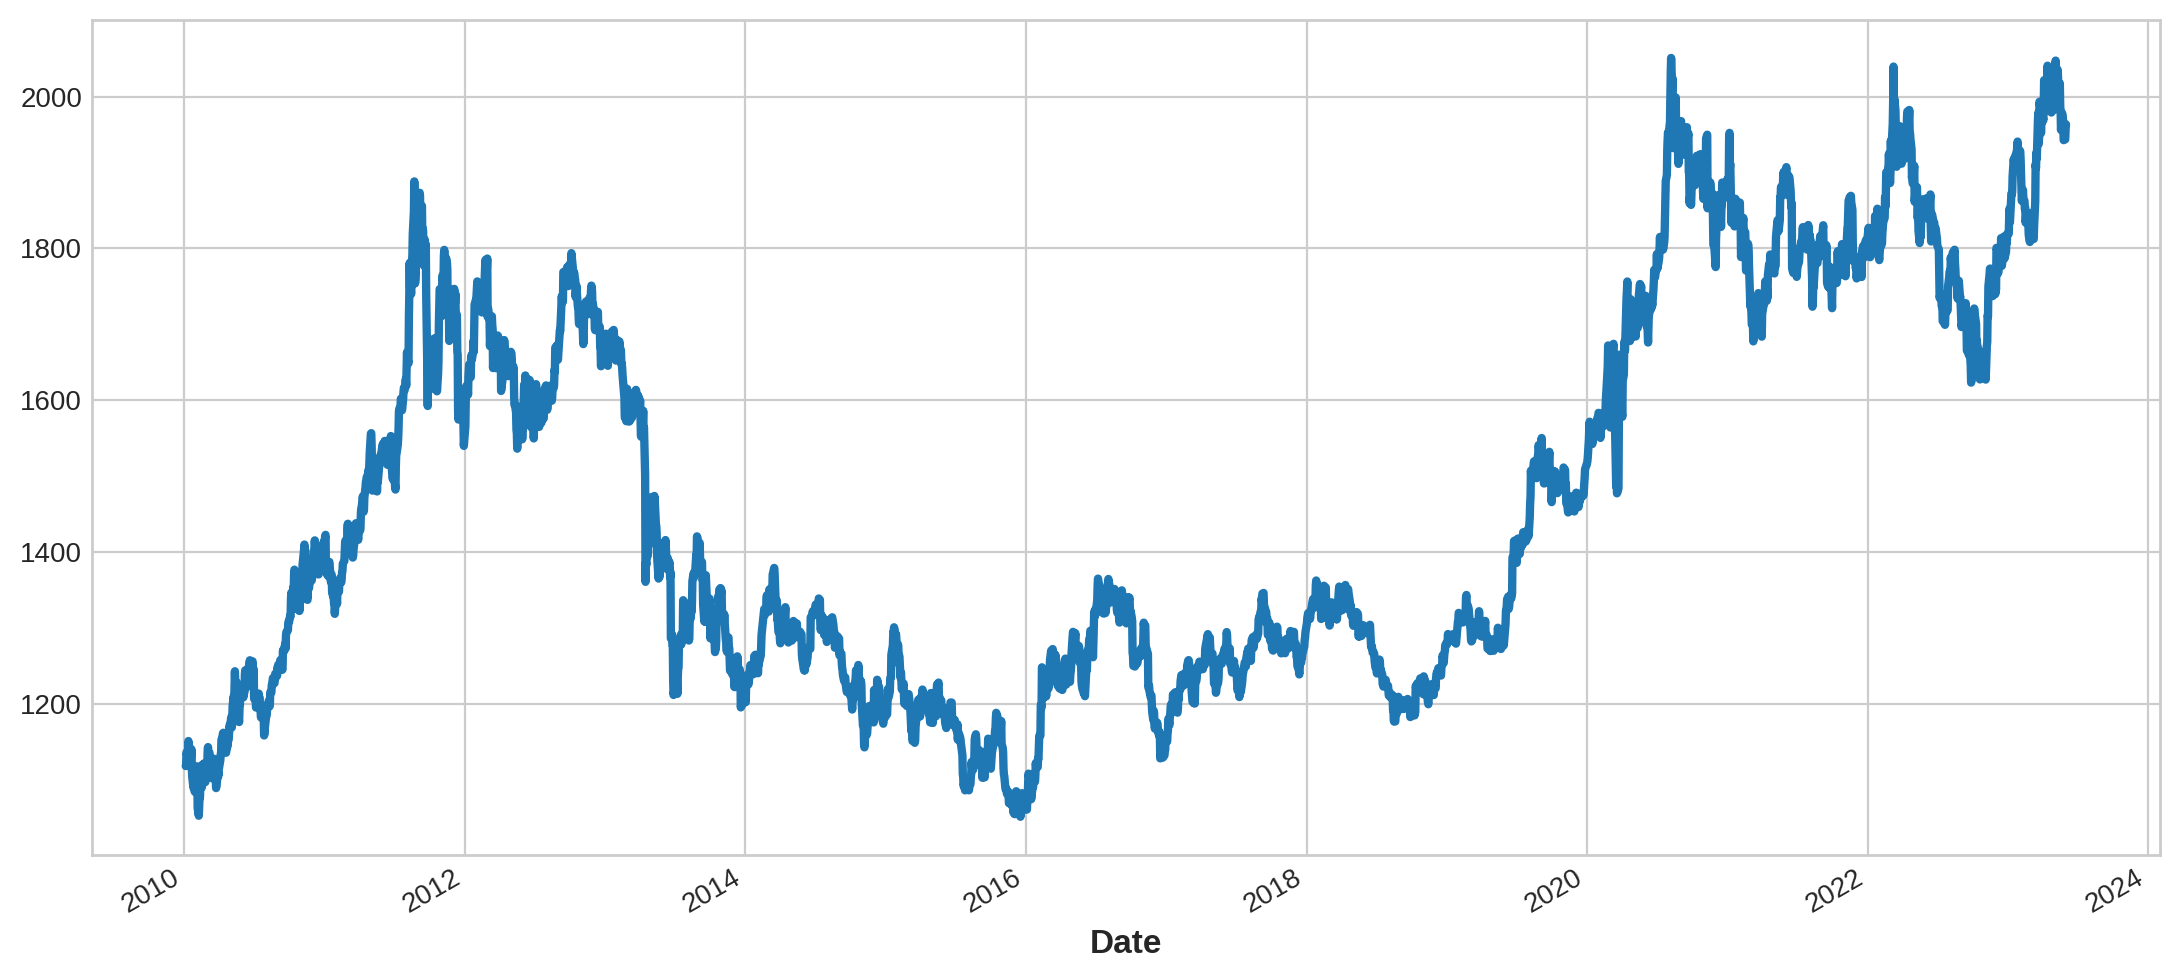

In [ ]:
ax = plt.gca()

ax = y_pred.plot(ax=ax, linewidth=3)

Text(0.5, 1.0, 'Lag Plot Of Gold Prices')

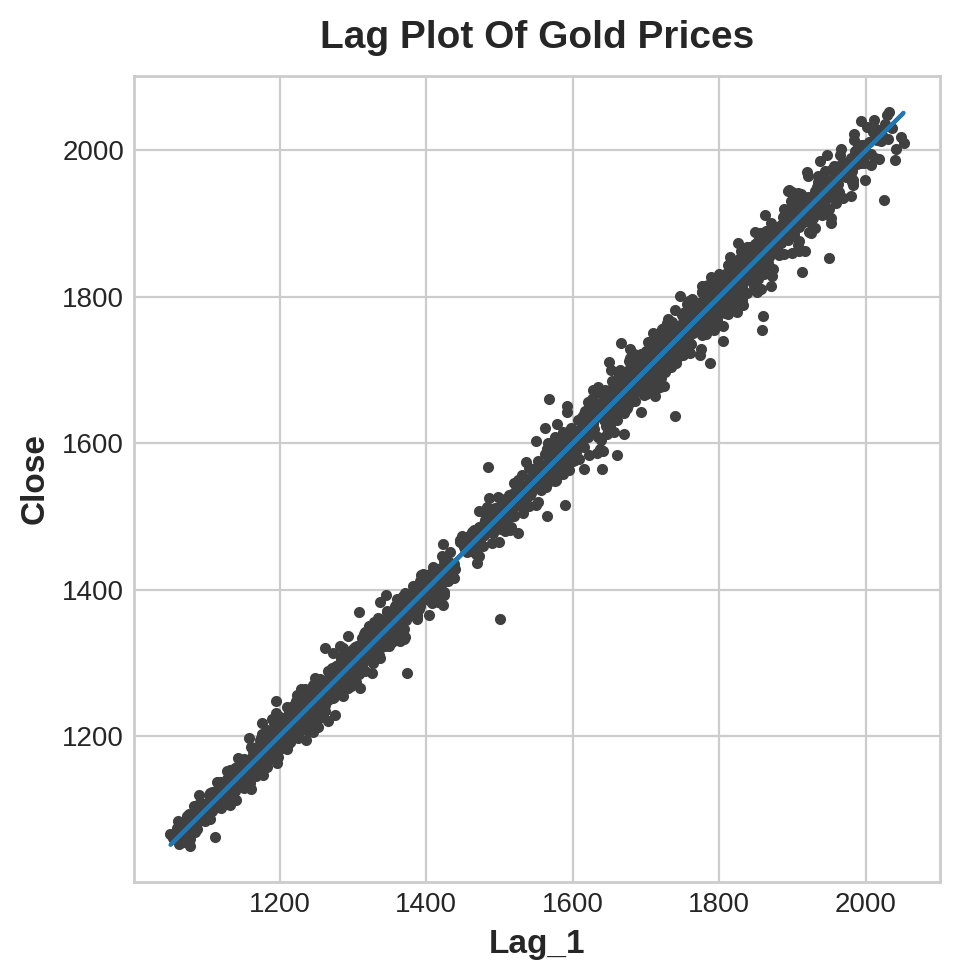

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel("Close")
ax.set_xlabel("Lag_1")
ax.set_title("Lag Plot Of Gold Prices")

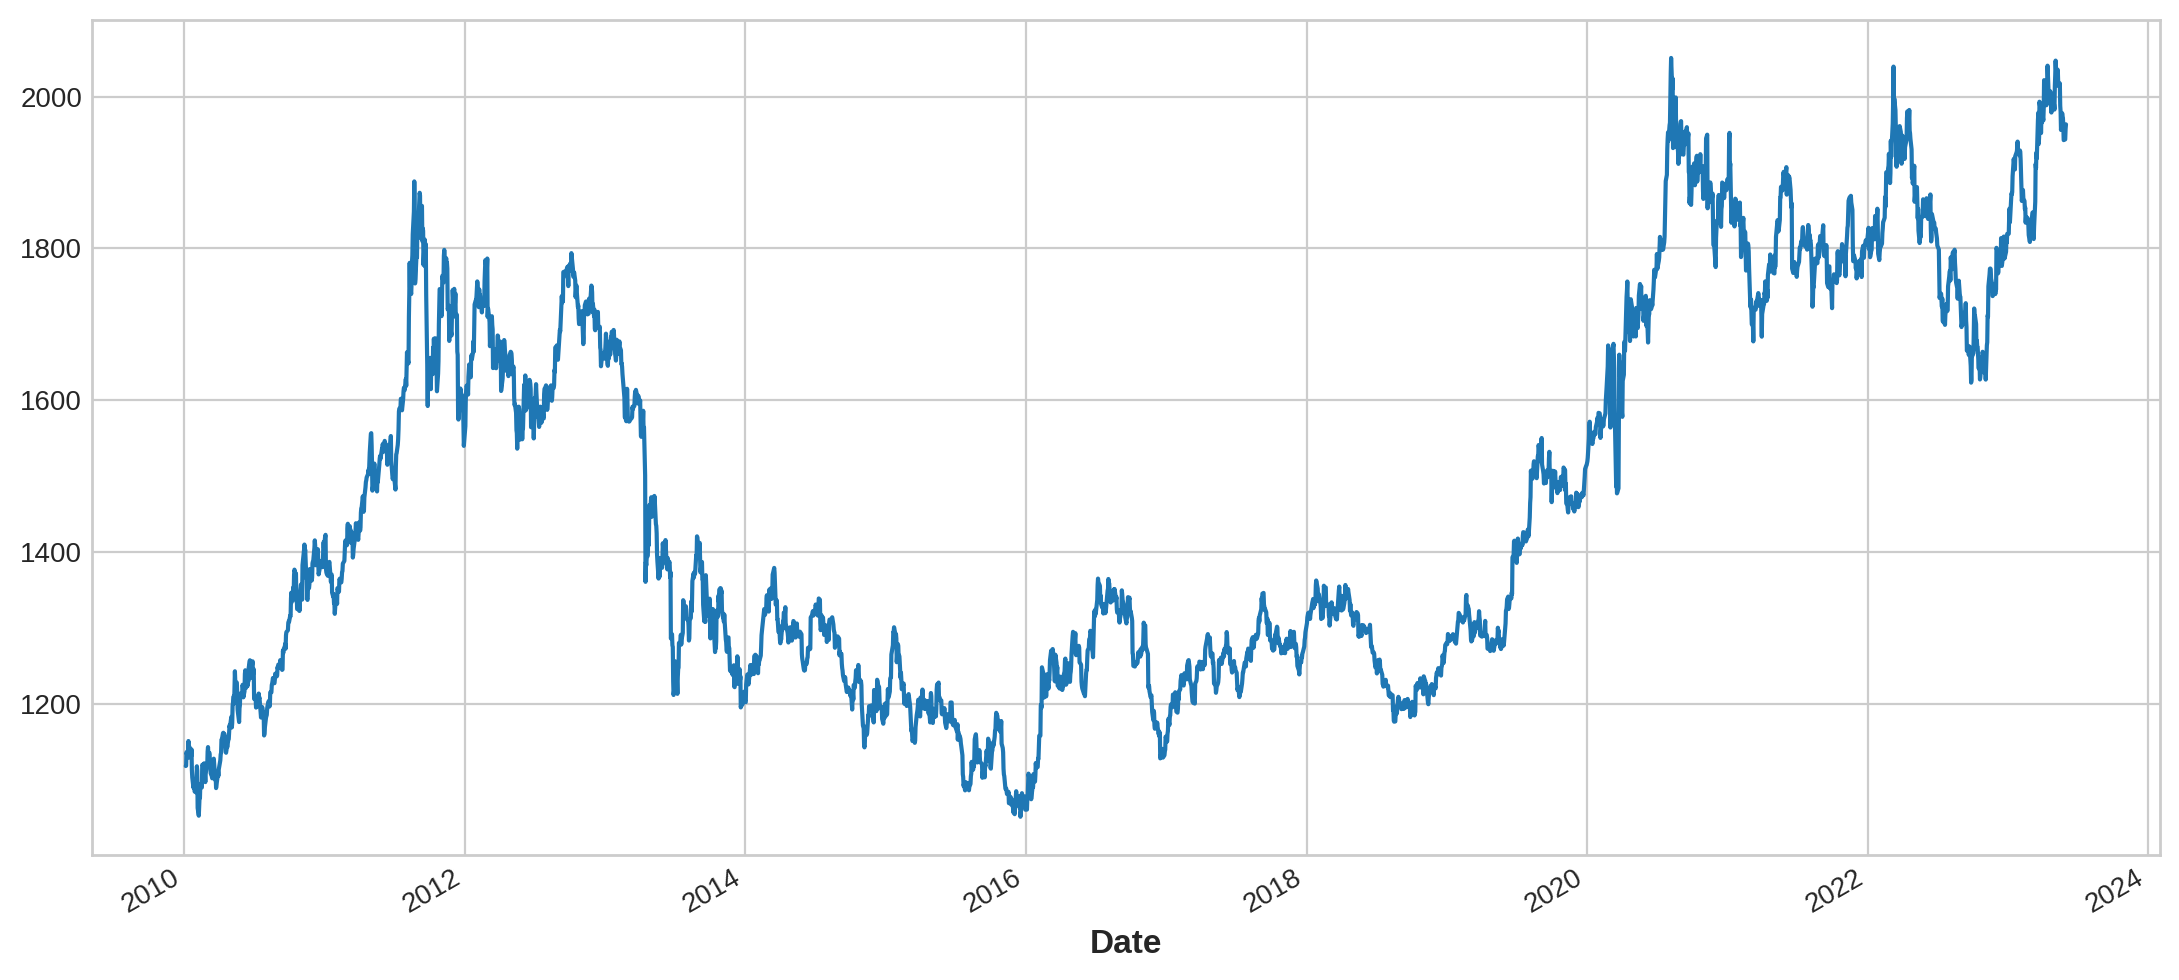

In [ ]:

ax = y_pred.plot()

# **Finding Trends**

In [ ]:


df.dtypes

Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
Time         object
date         object
Lag_1        object
dtype: object

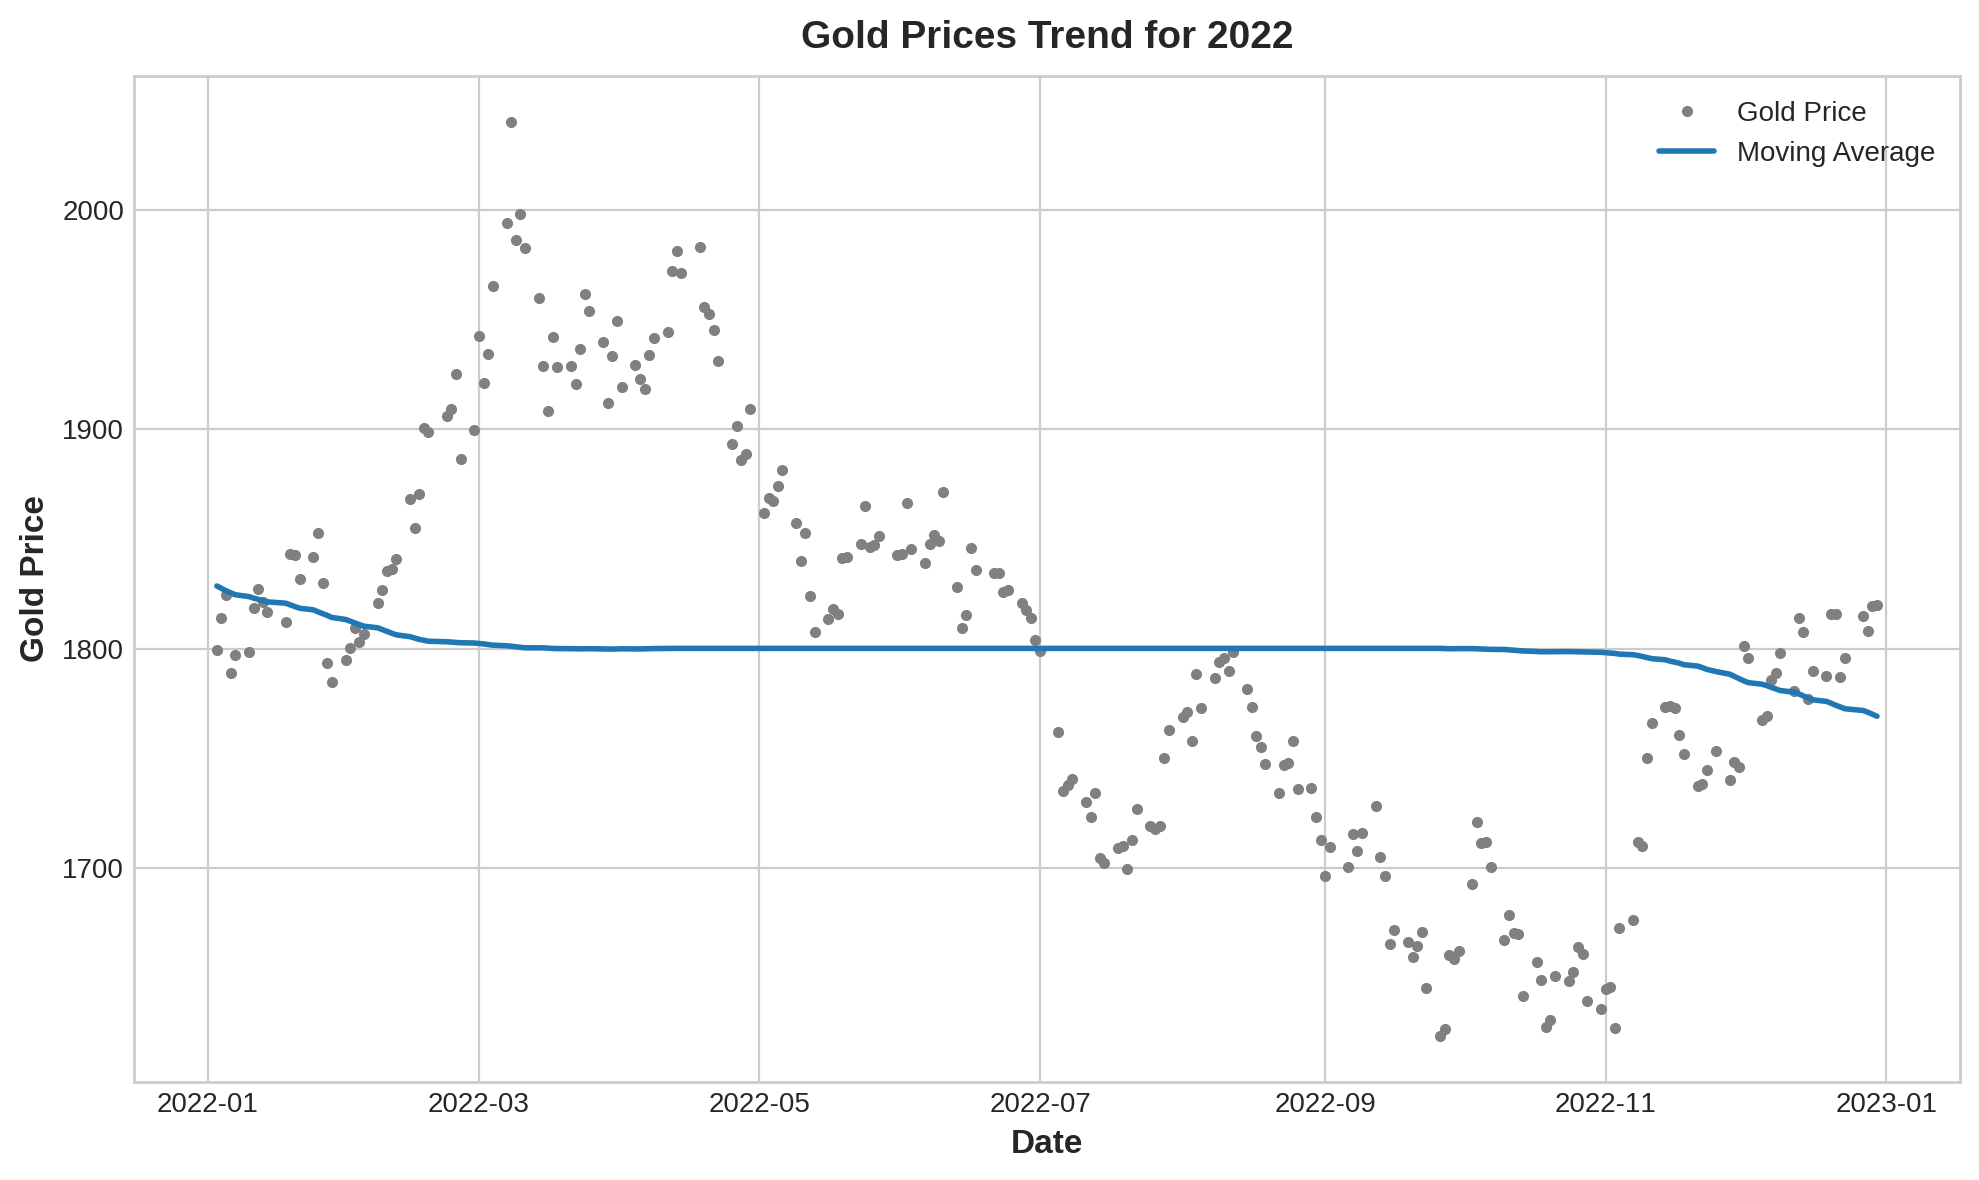

In [ ]:

df.set_index('date', inplace=True)
year = 2022
df_year = df[df.index.year == year]

# Calculate the moving average
window = 365
moving_avg = df_year['Close'].rolling(window=window, center=True, min_periods=int(window/2)).mean()

# Plot the gold prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df_year.index, df_year['Close'], '.', color='0.5', label='Gold Price')
plt.plot(moving_avg.index, moving_avg, linewidth=2, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title(f'Gold Prices Trend for {year}')
plt.legend()
plt.grid(True)
plt.show()

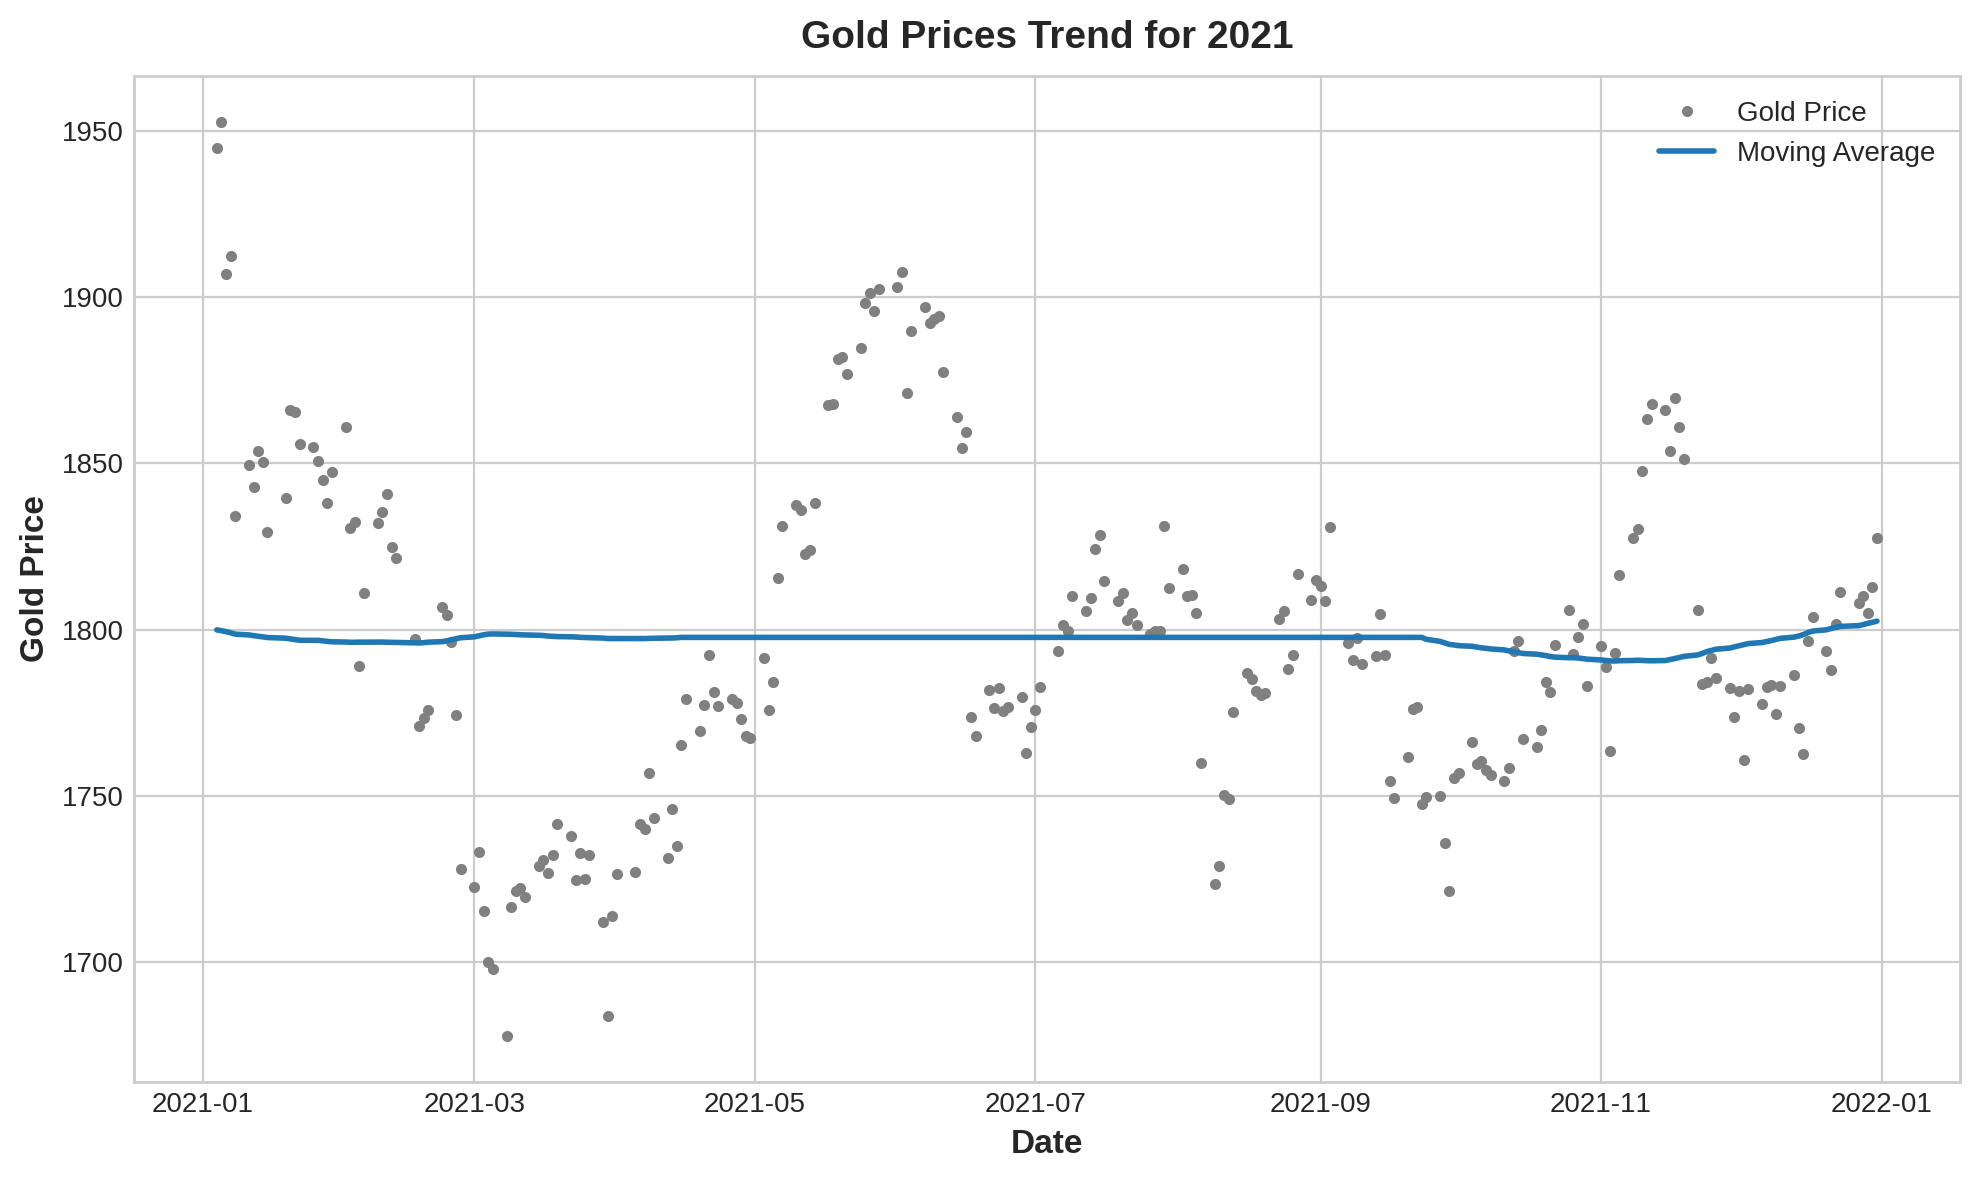

In [ ]:
year = 2021
df_year = df[df.index.year == year]

# Calculate the moving average
window = 365
moving_avg = df_year['Close'].rolling(window=window, center=True, min_periods=int(window/2)).mean()

# Plot the gold prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df_year.index, df_year['Close'], '.', color='0.5', label='Gold Price')
plt.plot(moving_avg.index, moving_avg, linewidth=2, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title(f'Gold Prices Trend for {year}')
plt.legend()
plt.grid(True)
plt.show()

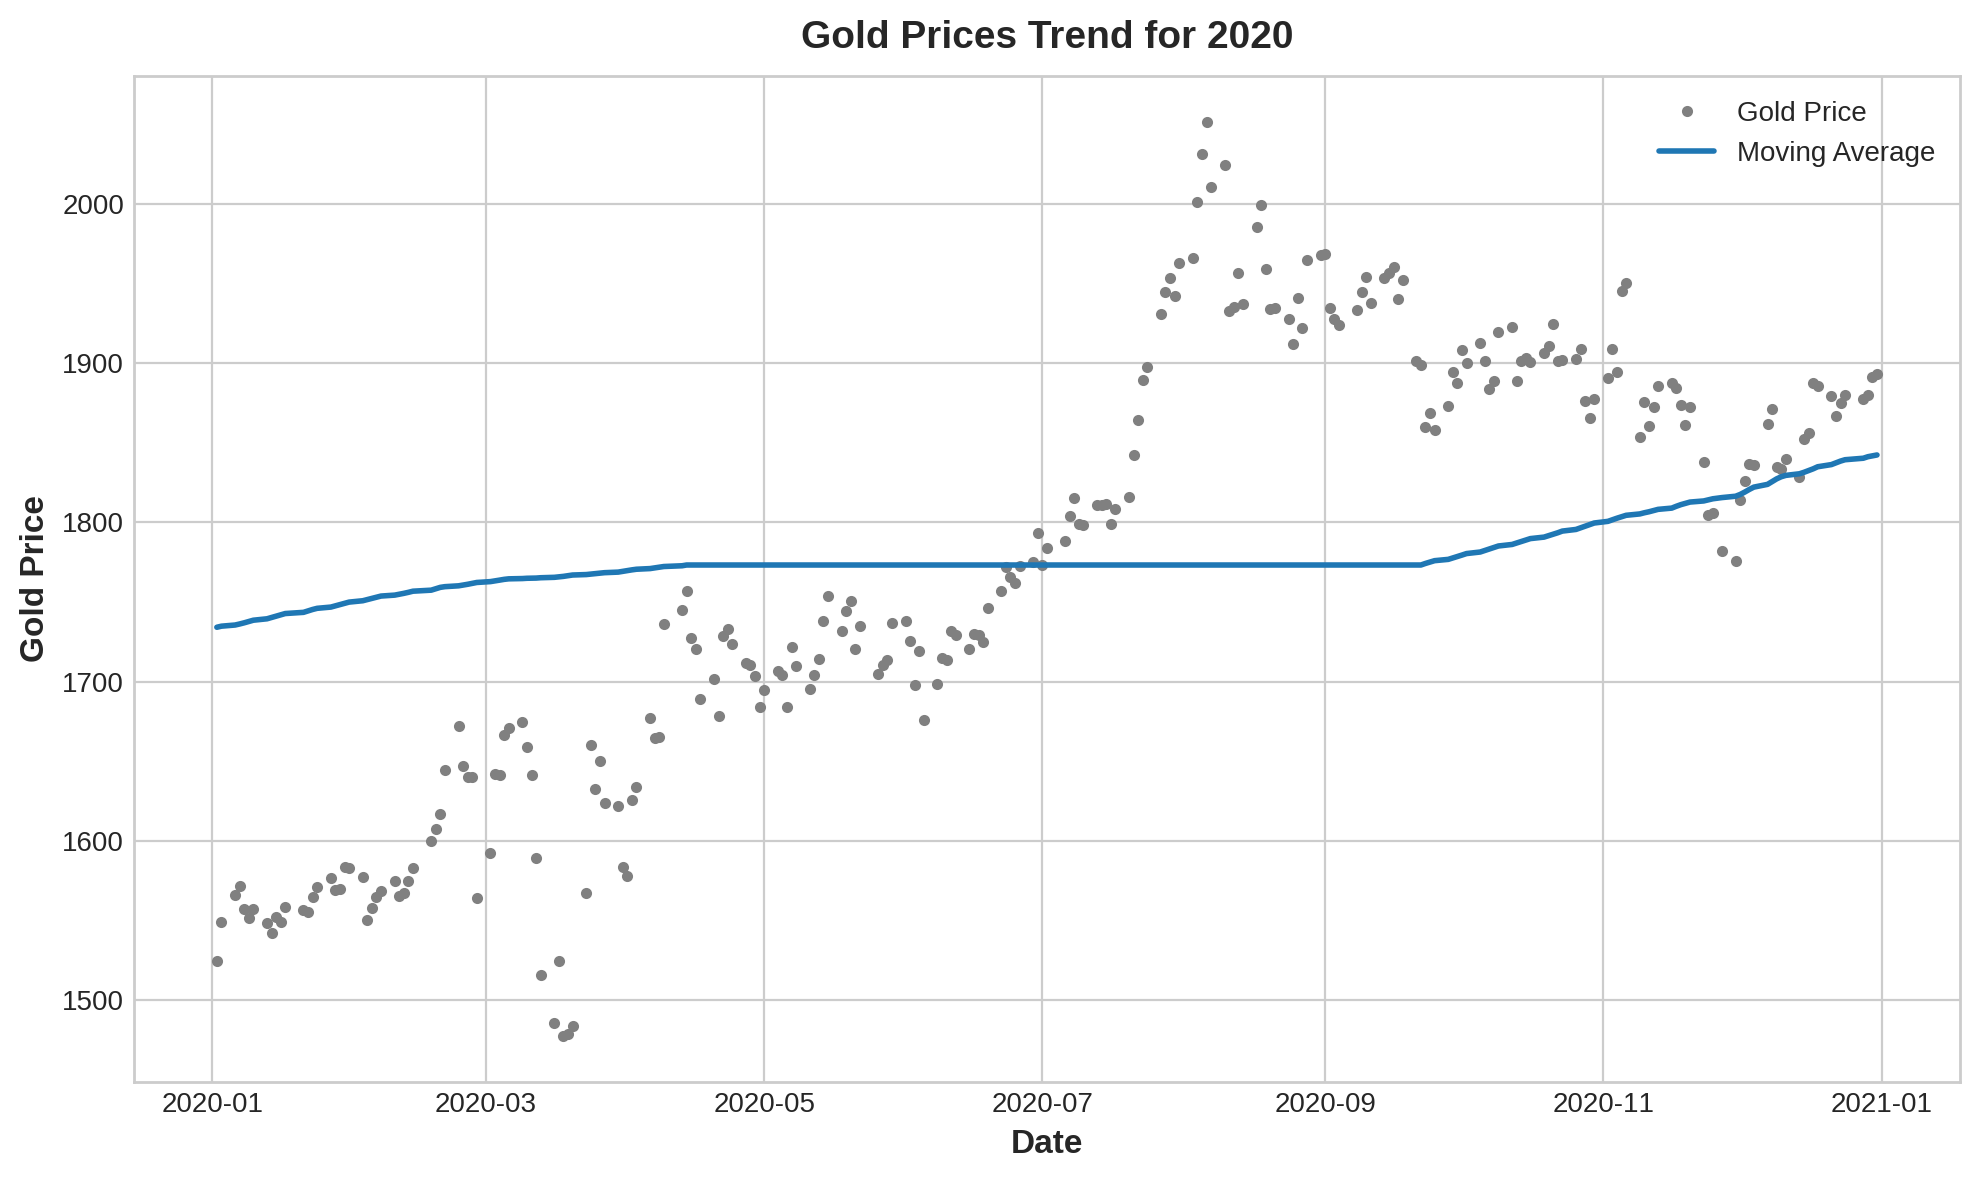

In [ ]:
year = 2020
df_year = df[df.index.year == year]

# Calculate the moving average
window = 365
moving_avg = df_year['Close'].rolling(window=window, center=True, min_periods=int(window/2)).mean()

# Plot the gold prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df_year.index, df_year['Close'], '.', color='0.5', label='Gold Price')
plt.plot(moving_avg.index, moving_avg, linewidth=2, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title(f'Gold Prices Trend for {year}')
plt.legend()
plt.grid(True)
plt.show()

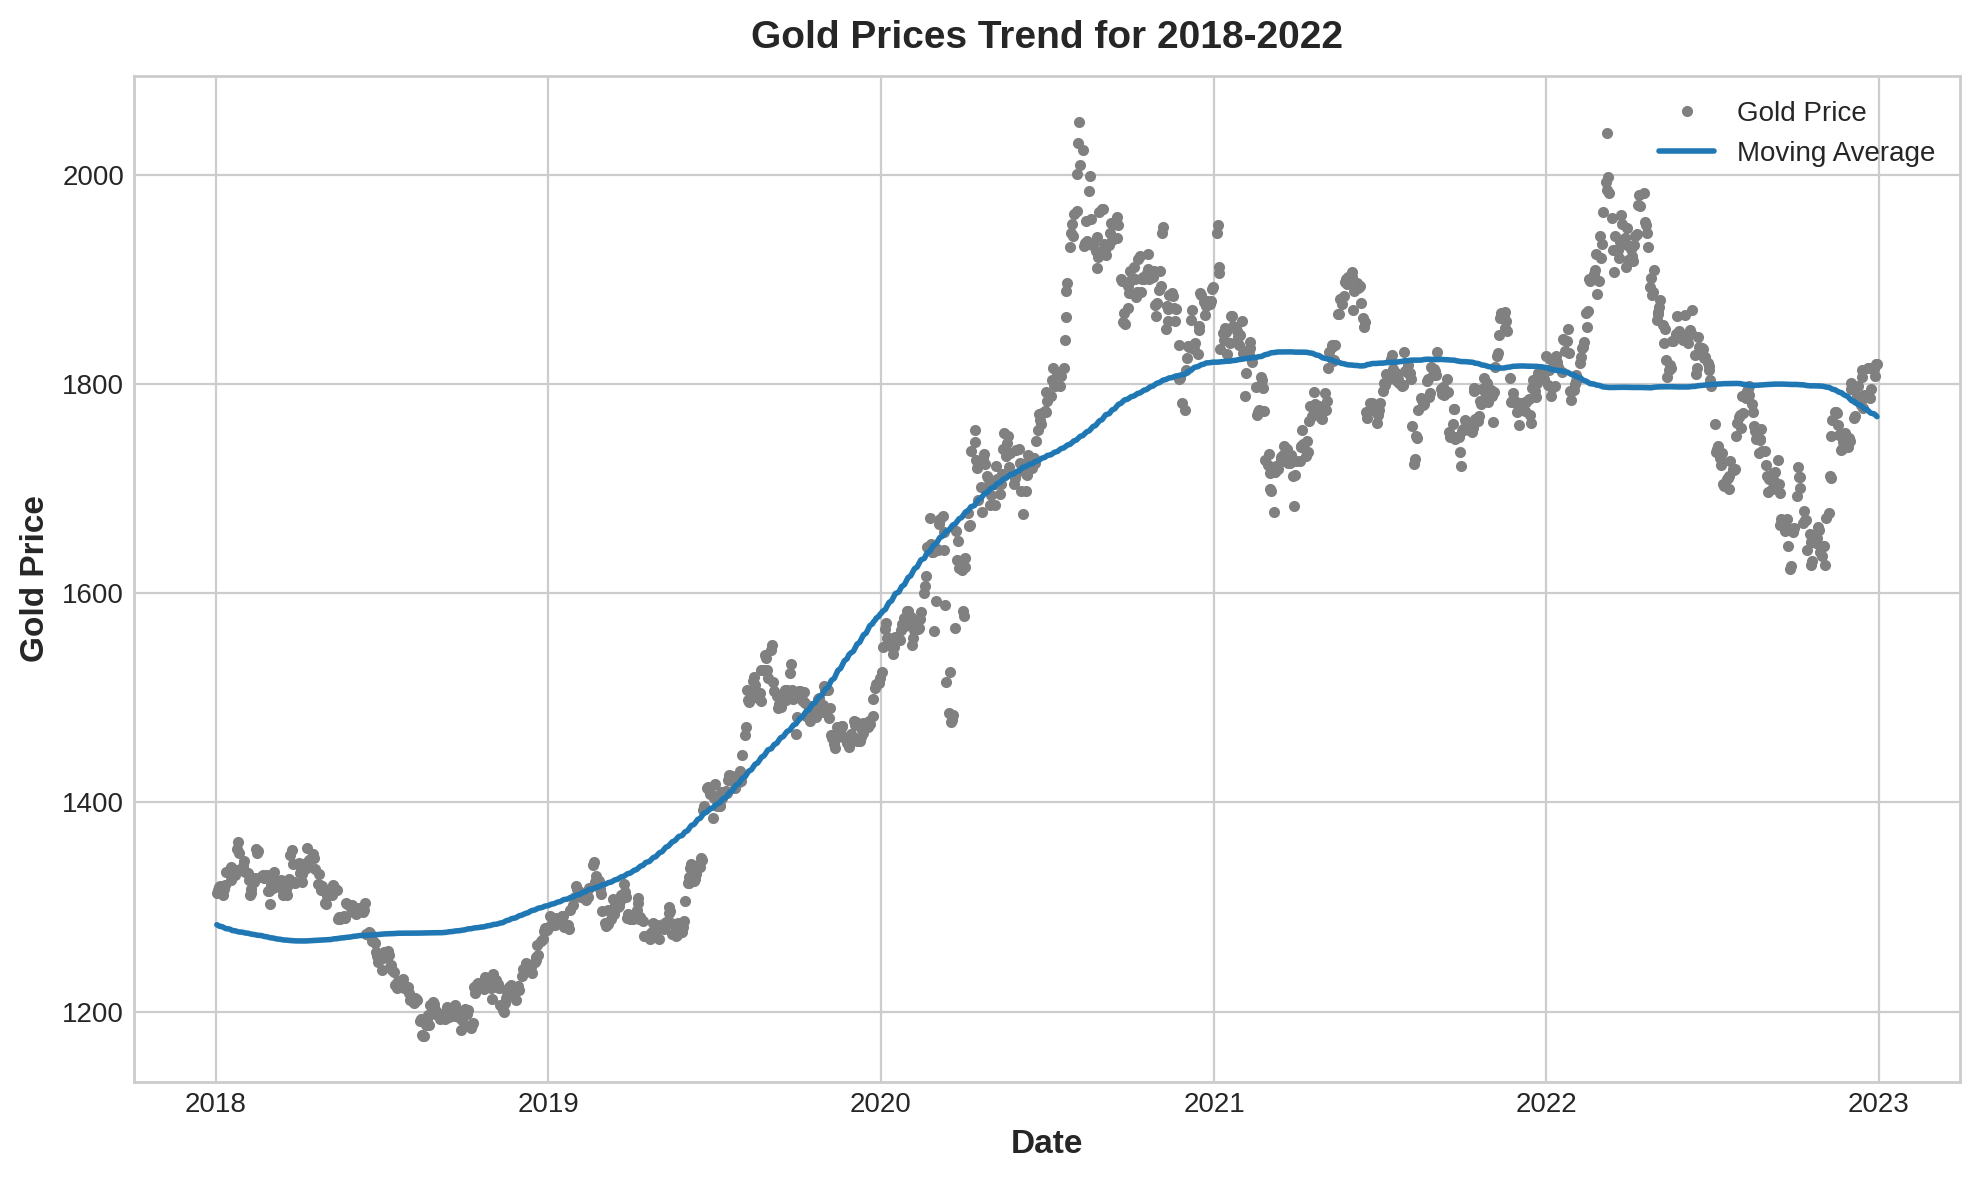

In [ ]:
start_year = 2018
end_year = start_year + 4
df_5years = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

window = 365
moving_avg = df_5years['Close'].rolling(window=window, center=True, min_periods=int(window/2)).mean()

# Plot the gold prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df_5years.index, df_5years['Close'], '.', color='0.5', label='Gold Price')
plt.plot(moving_avg.index, moving_avg, linewidth=2, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title(f'Gold Prices Trend for 2018-2022')
plt.legend()
plt.grid(True)
plt.show()

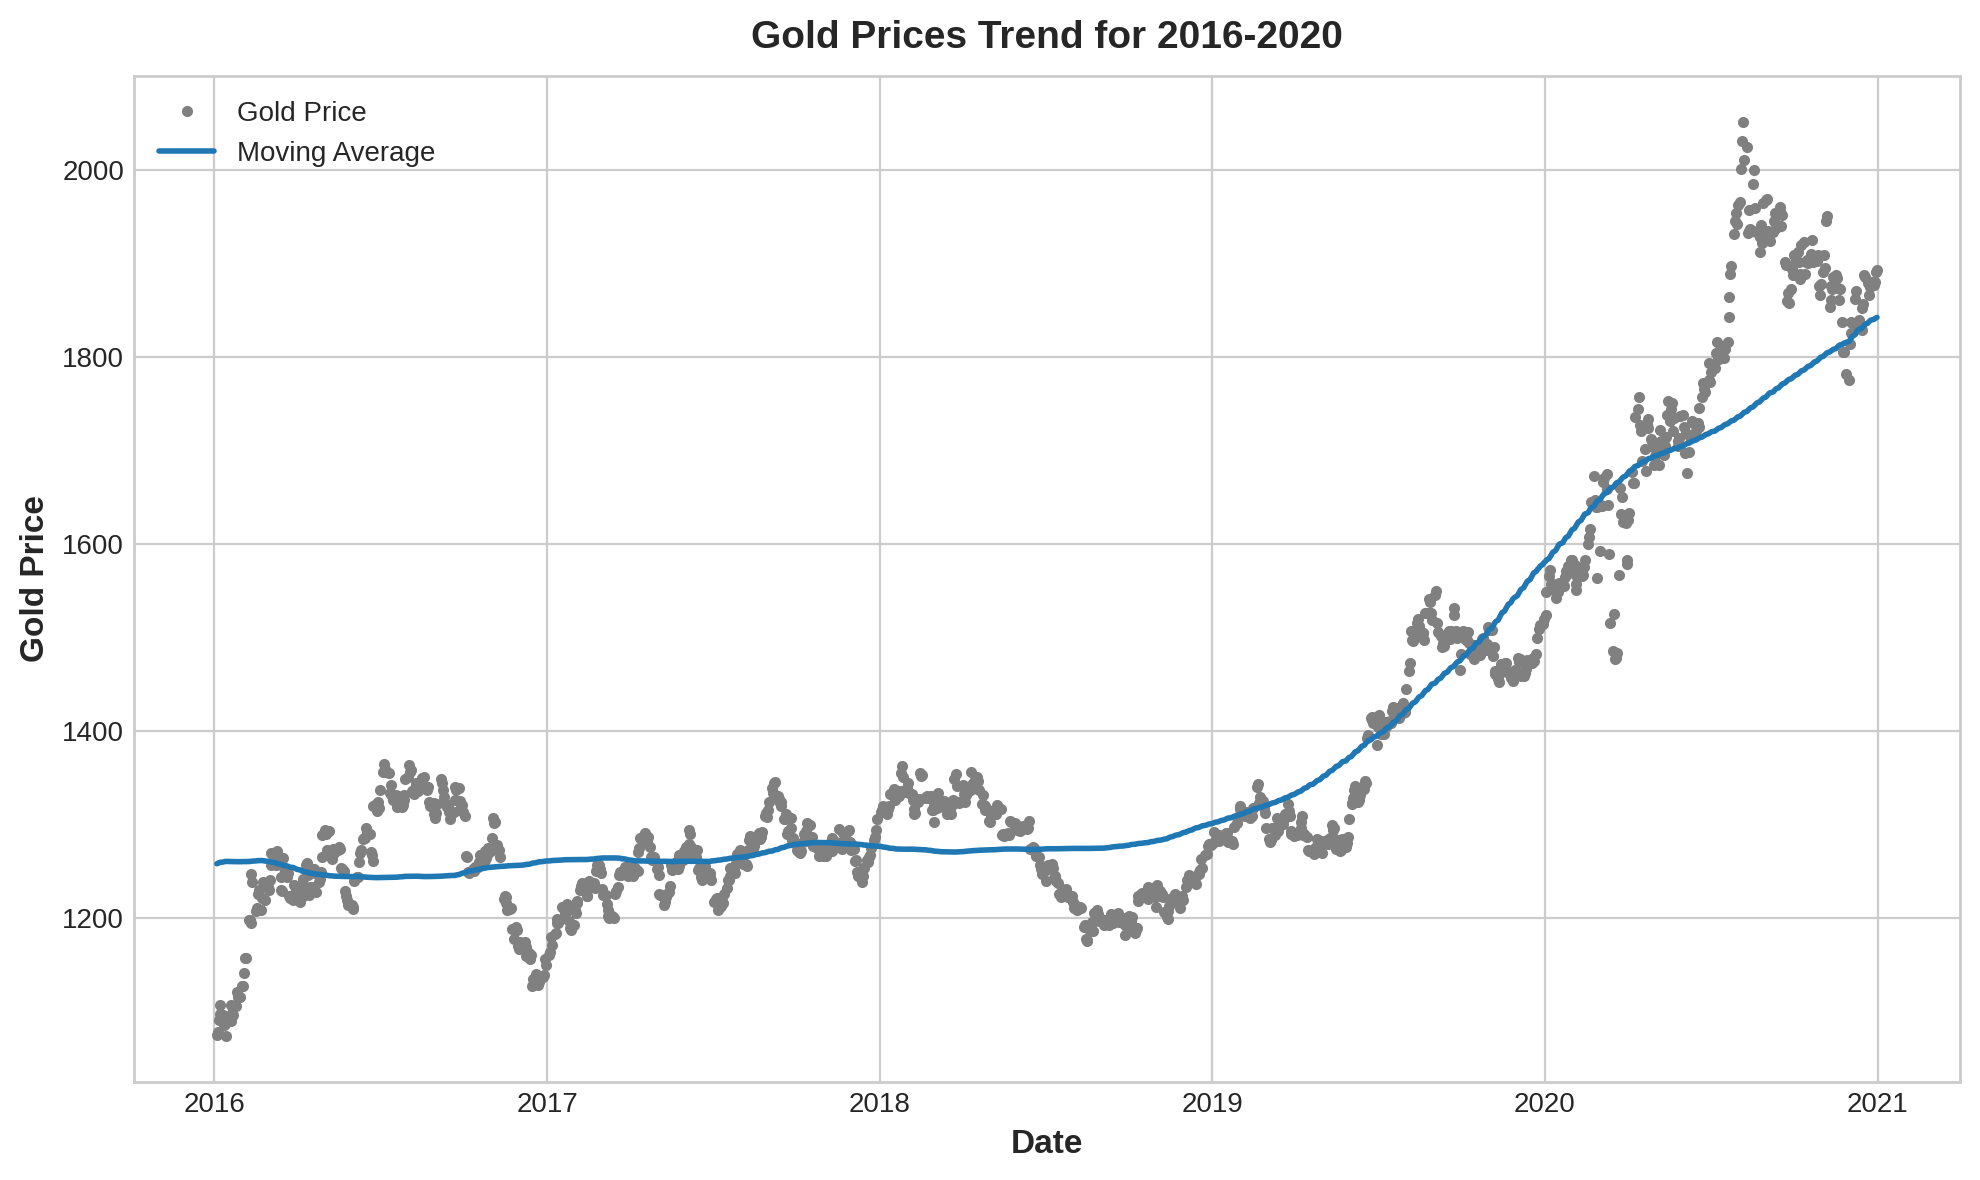

In [ ]:
start_year = 2016
end_year = start_year + 4
df_5years = df[(df.index.year >= start_year) & (df.index.year <= end_year)]

window = 365
moving_avg = df_5years['Close'].rolling(window=window, center=True, min_periods=int(window/2)).mean()

# Plot the gold prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df_5years.index, df_5years['Close'], '.', color='0.5', label='Gold Price')
plt.plot(moving_avg.index, moving_avg, linewidth=2, label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title(f'Gold Prices Trend for 2016-2020')
plt.legend()
plt.grid(True)
plt.show()

**After seeing the trend it is shown that after 2020 start gold price hike too much its value was more or less same for last 3 years (up down some time) but after 2020 it is going only upside.**

In [ ]:
X = data.copy()

# days within a week
X["day"] = X.index.dayofweek  
X["week"] = X.index.week

In [ ]:
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

In [ ]:
import seaborn as sns

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )

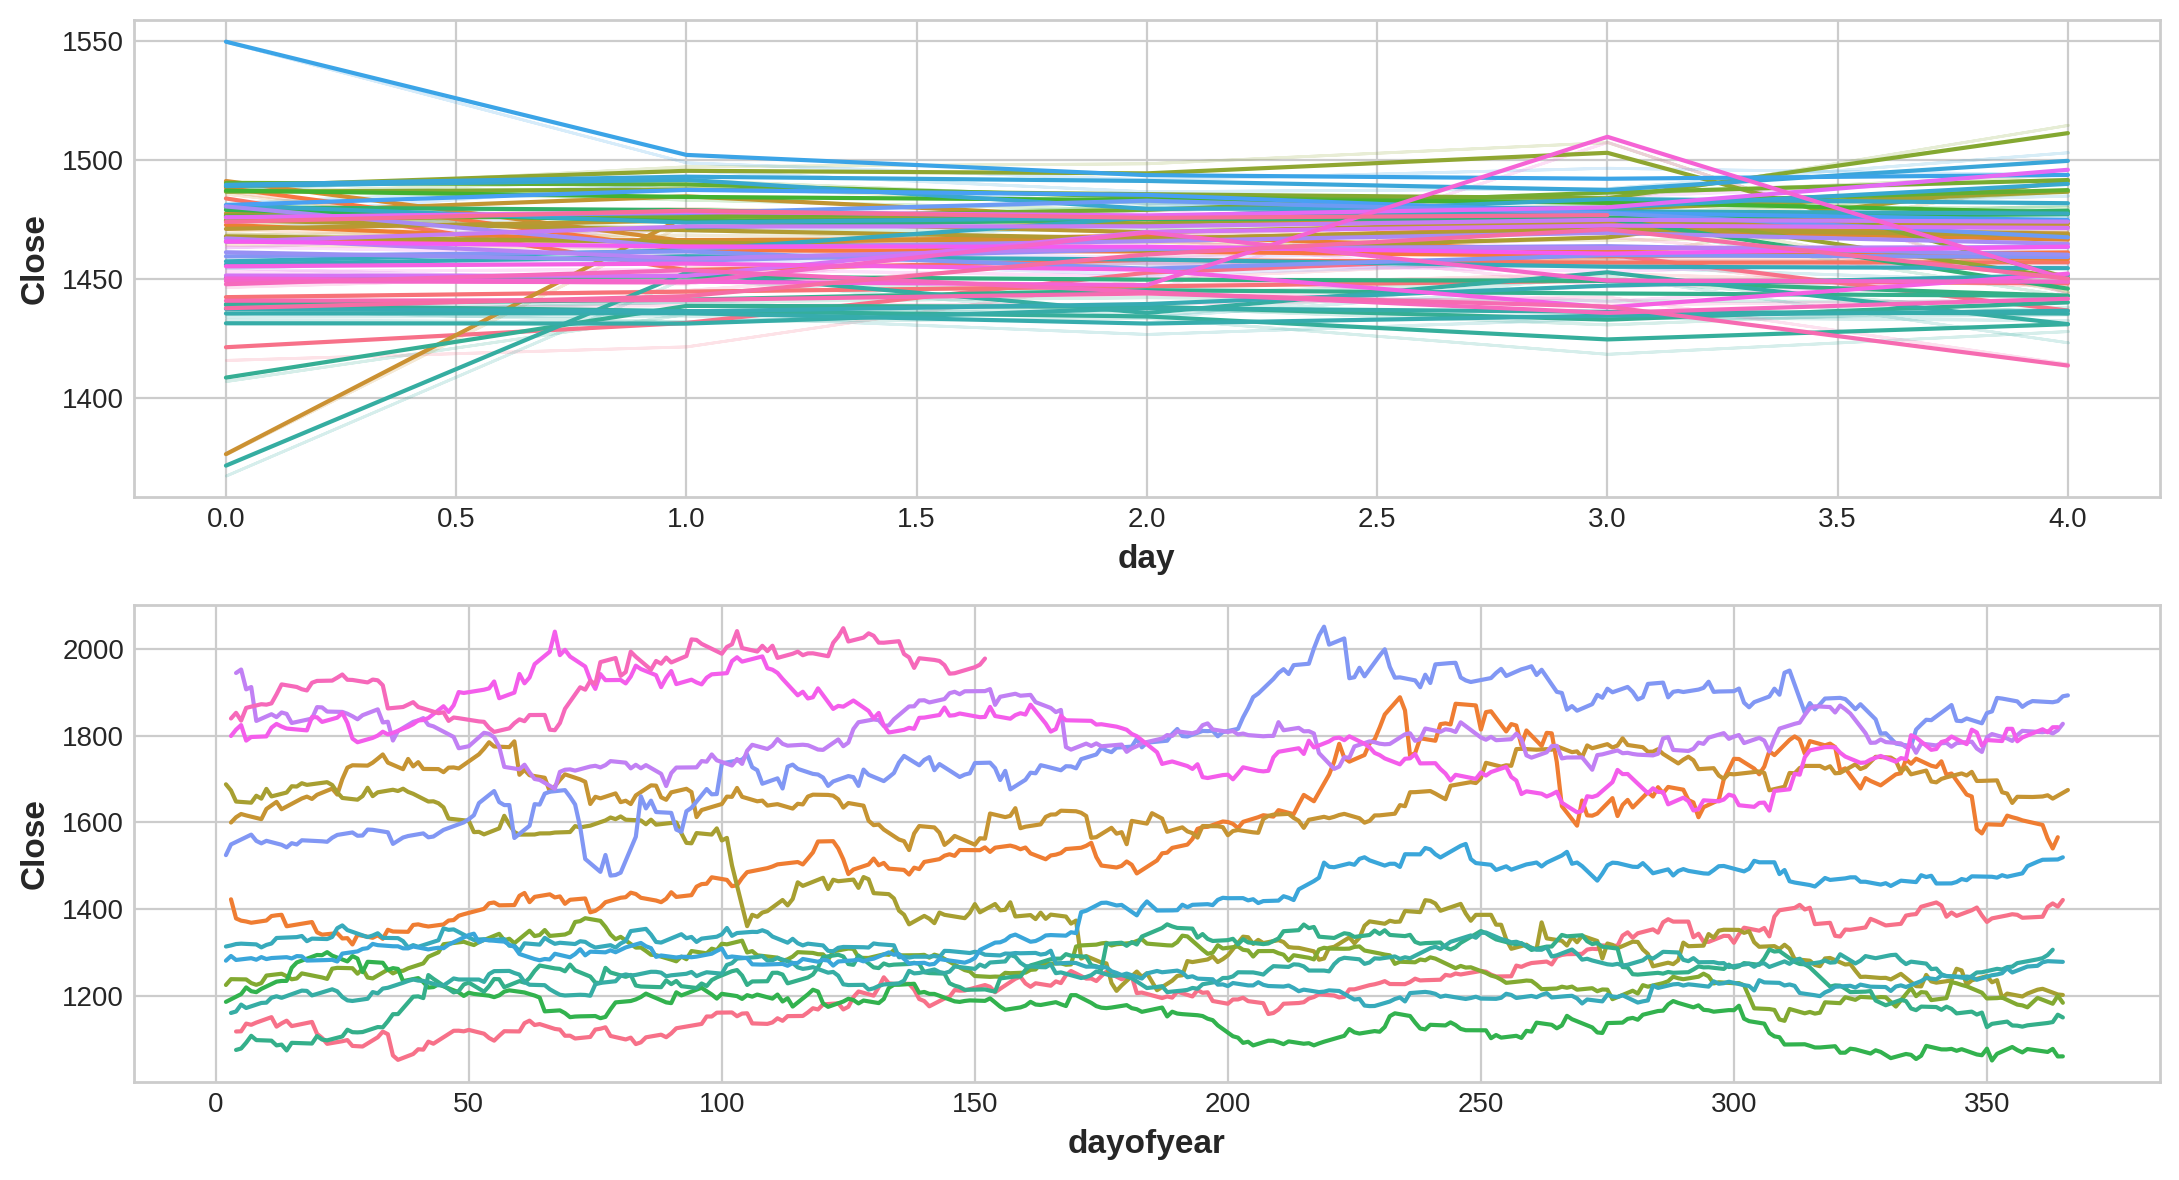

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="Close", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="Close", period="year", freq="dayofyear", ax=ax1)

# **LSTM**

In [ ]:
pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30',
               '2023-05-31', '2023-06-01'],
              dtype='datetime64[ns]', name='date', length=3375, freq=None)

In [ ]:

import pickle
import seaborn as sns
from scalecast.Forecaster import Forecaster

In [ ]:
df['dates'] = df.index

In [ ]:
f = Forecaster(
    y=df["Close"],
    current_dates=df["dates"]
)

f

Forecaster(
    DateStartActuals=2010-01-04T00:00:00.000000000
    DateEndActuals=2023-06-01T00:00:00.000000000
    Freq=None
    N_actuals=3375
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

In [ ]:
df.dtypes

Open                 object
High                 object
Low                  object
Close                object
Adj Close            object
Volume               object
Time                 object
Lag_1                object
dates        datetime64[ns]
dtype: object

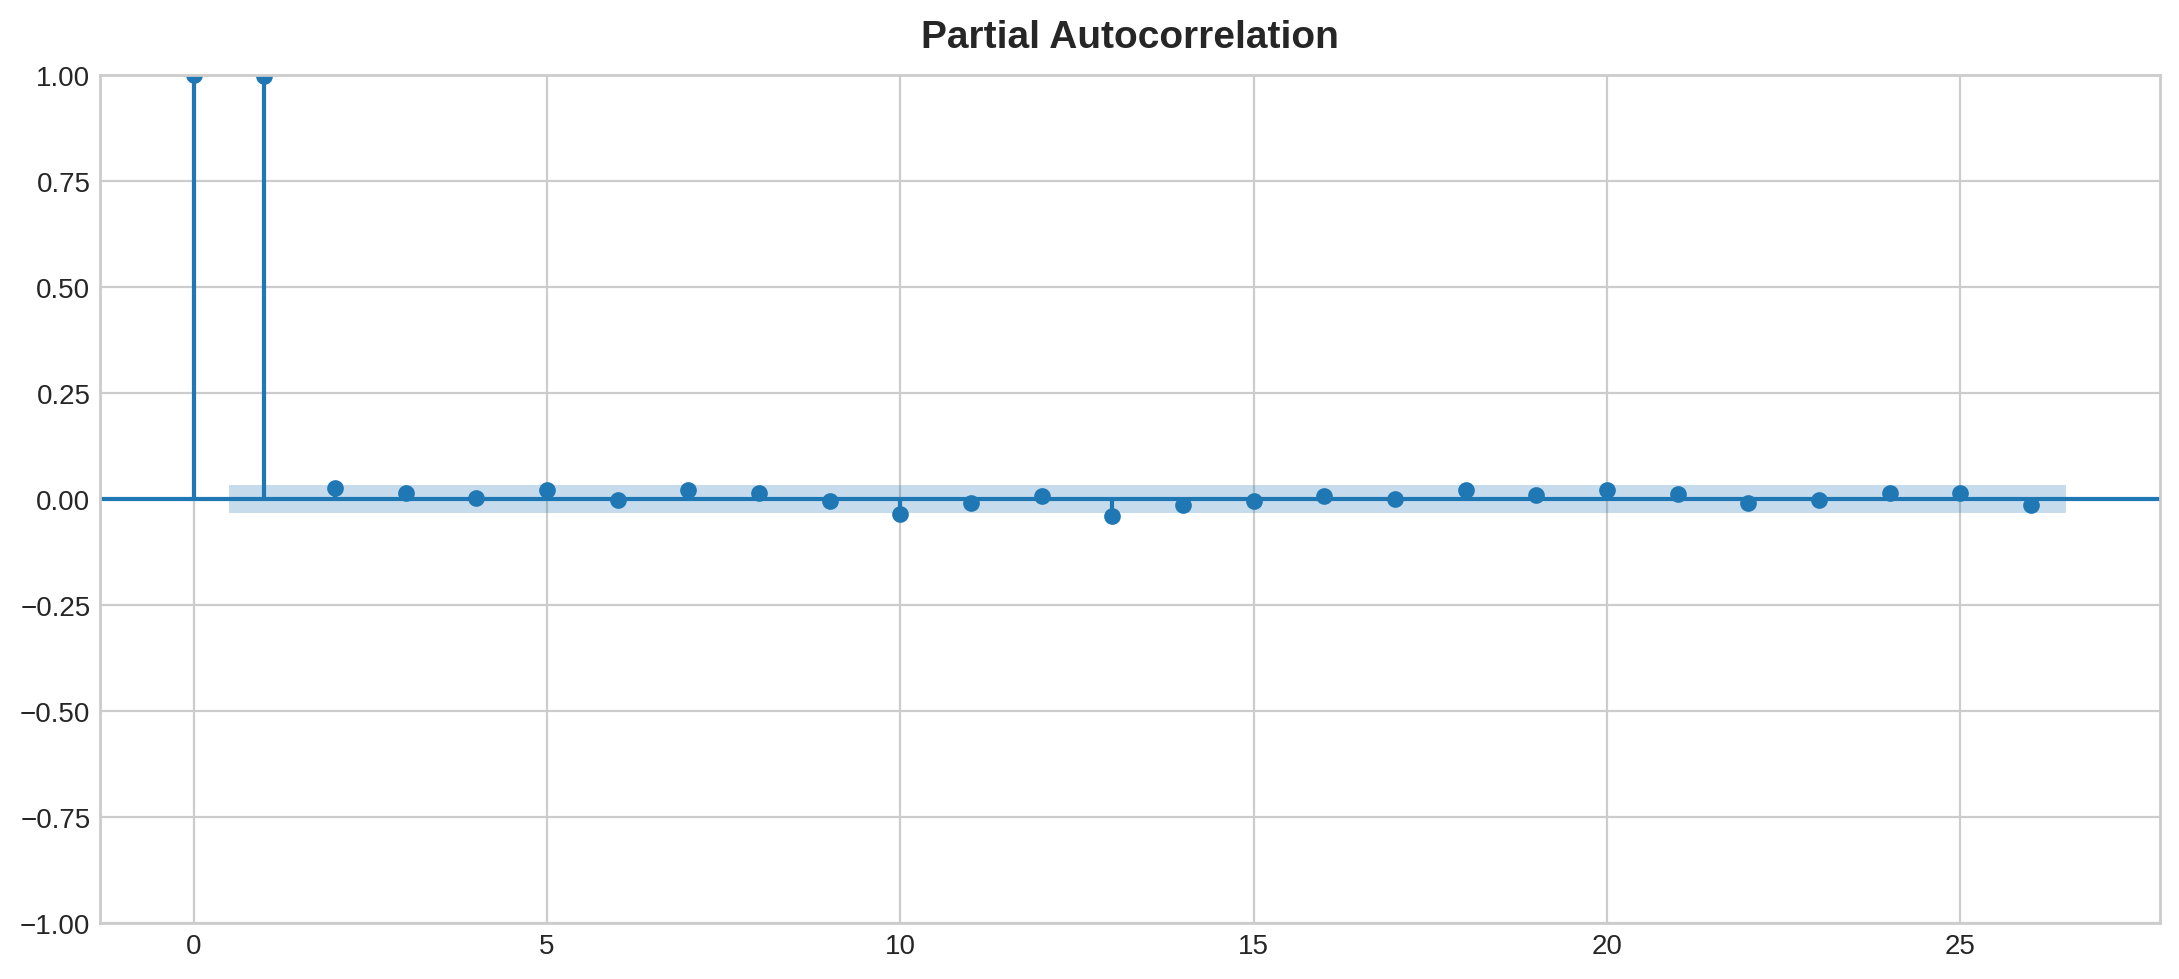

In [ ]:
f.plot_pacf(lags=26)
plt.show()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,Lag_1,dates
date,,,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,0,None,2010-01-04
2010-01-05,1118.099976,1126.5,1115.0,1118.099976,1118.099976,53,1,1117.699951,2010-01-05
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363,2,1118.099976,2010-01-06
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56,3,1135.900024,2010-01-07
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4,1133.099976,2010-01-08


In [ ]:
df = df.values.reshape(-1, 1)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Retrieve gold price data from Yahoo Finance
g_data = yf.download('GC=F', start='2010-01-01', end='2023-06-02')

# Extract the 'Close' prices and convert to a numpy array
prices = g_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Define the number of previous time steps to use for prediction
n_steps = 30

# Prepare the training data
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i-n_steps:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the test data
X_test, y_test = [], []
for i in range(n_steps, len(test_data)):
    X_test.append(test_data[i-n_steps:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)

# Scale the predictions back to the original range
predictions = scaler.inverse_transform(predictions)

# Extend the input sequence with the predicted values for future predictions
input_sequence = np.append(X_test[-1, 1:], predictions[-1])

# Perform future predictions
future_predictions = []
num_steps = 30  # Number of future time steps to predict

for _ in range(num_steps):
    # Reshape the input data to be 3-dimensional (samples, timesteps, features)
    input_data = np.reshape(input_sequence[-n_steps:], (1, n_steps, 1))
    
    # Make a single-step prediction
    prediction = model.predict(input_data)
    
    # Scale the prediction back to the original range
    prediction = scaler.inverse_transform(prediction)
    
    # Append the prediction to the input sequence for the next iteration
    input_sequence = np.append(input_sequence, prediction)
    
    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0, 0])

# Generate future dates for the predictions
start_date = g_data.index[train_size+n_steps]
future_dates = pd.date_range(start=start_date, periods=num_steps, freq='D')

# Create a DataFrame to store the future predictions
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions})

# Print the future predictions
print(future_predictions_df)


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
84/84 [==============================] - 6s 12ms/step - loss: 0.0111
Epoch 2/10
84/84 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 3/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 4/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0010
Epoch 5/10
84/84 [==============================] - 1s 7ms/step - loss: 9.1368e-04
Epoch 6/10
84/84 [==============================] - 1s 7ms/step - loss: 8.4171e-04
Epoch 7/10
84/84 [==============================] - 1s 7ms/step - loss: 8.1395e-04
Epoch 8/10
84/84 [==============================] - 1s 7ms/step - loss: 7.2252e-04
Epoch 9/10
84/84 [==============================] - 1s 7ms/step - loss: 7.1687e-04
Epoch 10/10
1/1 [==============================] - 0s 84ms/step
         Date  Predicted Close
0  2020-11-10      2700.952637
1  2020-11-11      3280.193359
2  2020-11-12      3639.550293
3  2020-11

MSE Accuracy: -3312035.460267775


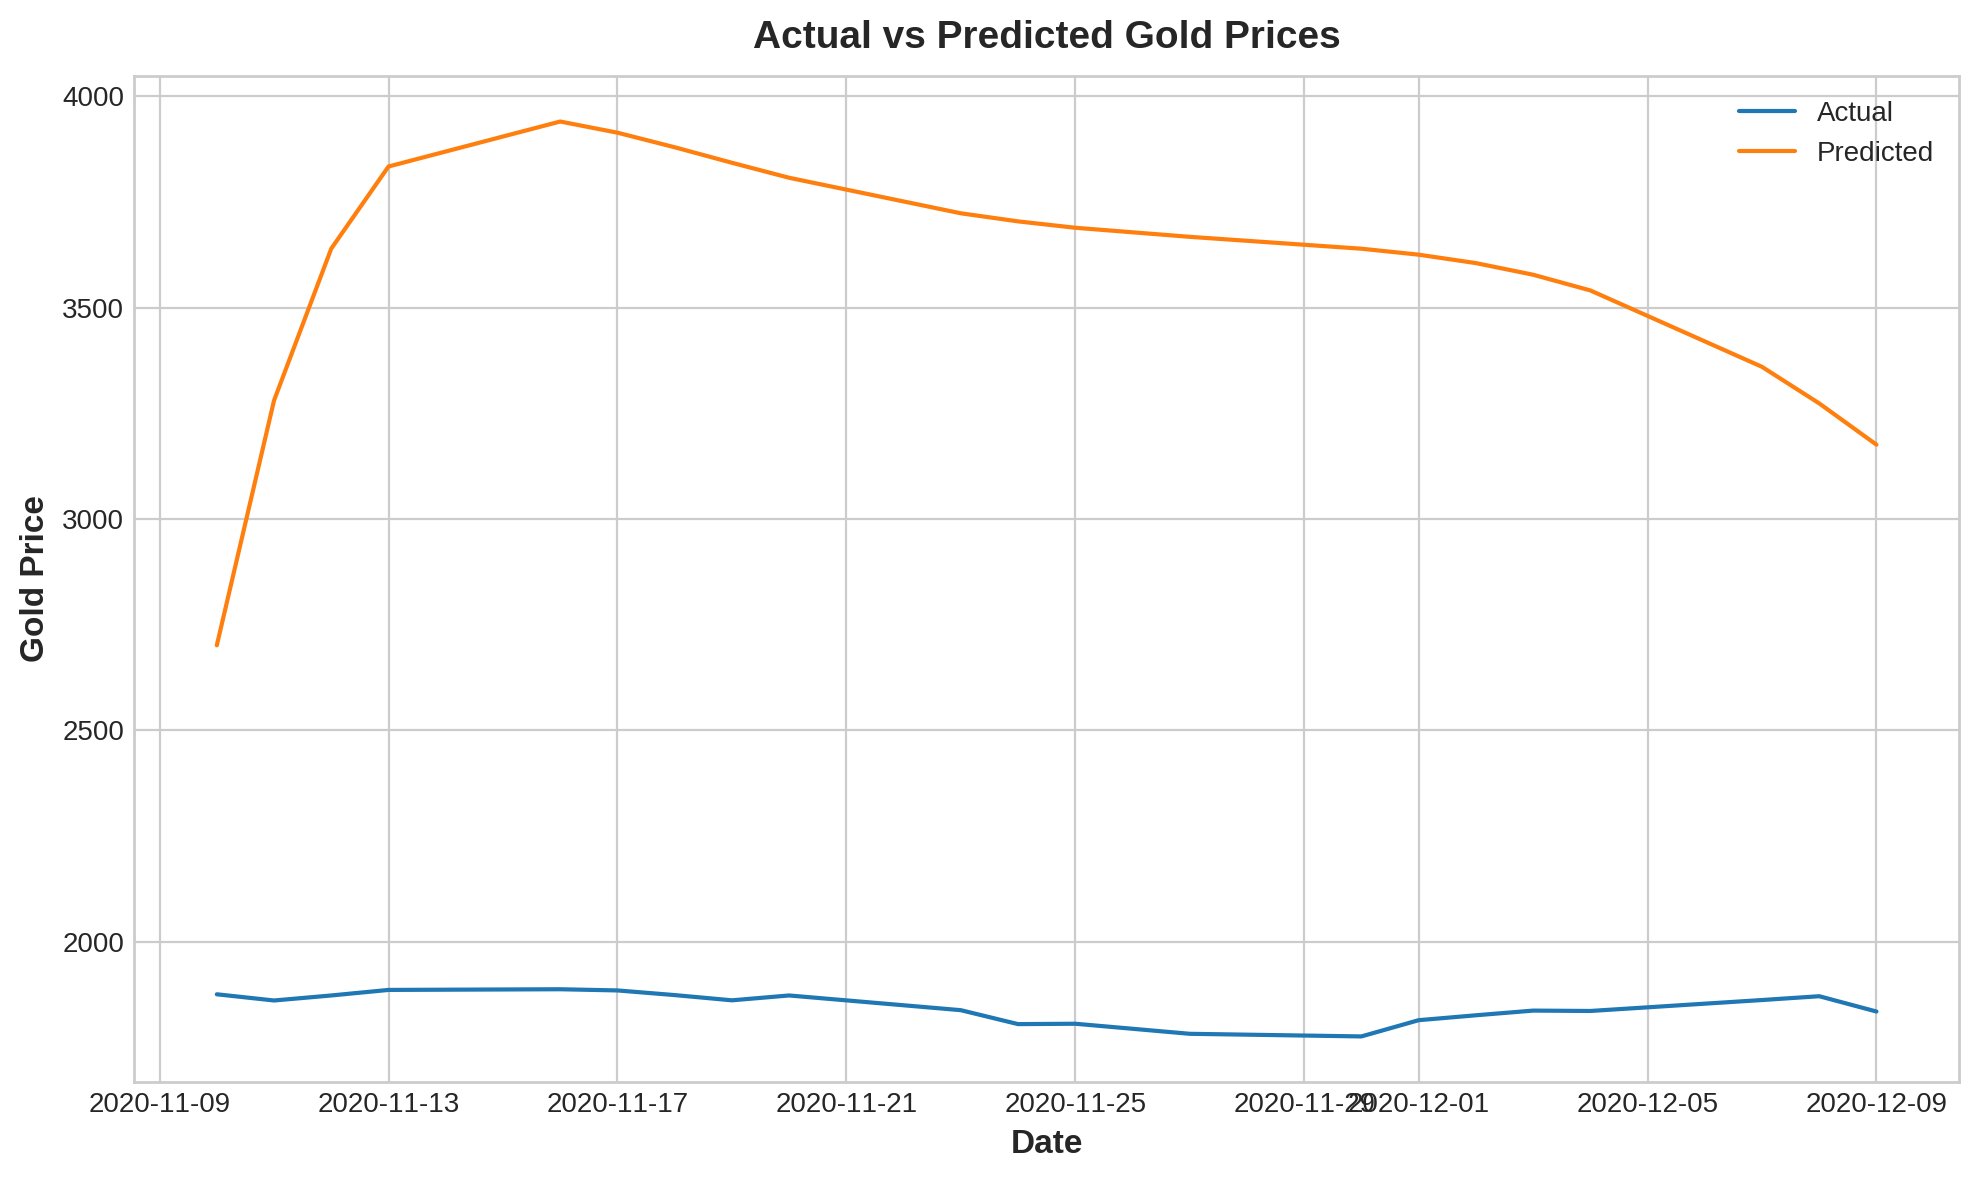

In [ ]:

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error (MSE) accuracy
mse = mean_squared_error(y_test, predictions)
accuracy = 100 - mse
print("MSE Accuracy:", accuracy)

# Create a DataFrame for the actual prices
actual_prices = pd.DataFrame({'Date': g_data.index[train_size+n_steps:], 'Actual Close': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()})

# Merge the actual and predicted prices DataFrames
prices_df = actual_prices.merge(future_predictions_df, on='Date')

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(prices_df['Date'], prices_df['Actual Close'], label='Actual')
plt.plot(prices_df['Date'], prices_df['Predicted Close'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
84/84 [==============================] - 4s 7ms/step - loss: 0.0082
Epoch 2/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 3/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 4/10
84/84 [==============================] - 1s 7ms/step - loss: 0.0010
Epoch 5/10
84/84 [==============================] - 1s 7ms/step - loss: 8.7738e-04
Epoch 6/10
84/84 [==============================] - 1s 8ms/step - loss: 9.2229e-04
Epoch 7/10
84/84 [==============================] - 1s 8ms/step - loss: 7.8388e-04
Epoch 8/10
84/84 [==============================] - 1s 8ms/step - loss: 6.8324e-04
Epoch 9/10
84/84 [==============================] - 1s 7ms/step - loss: 7.0726e-04
Epoch 10/10
21/21 [==============================] - 1s 5ms/step
MSE Accuracy: -3355399.0969612394


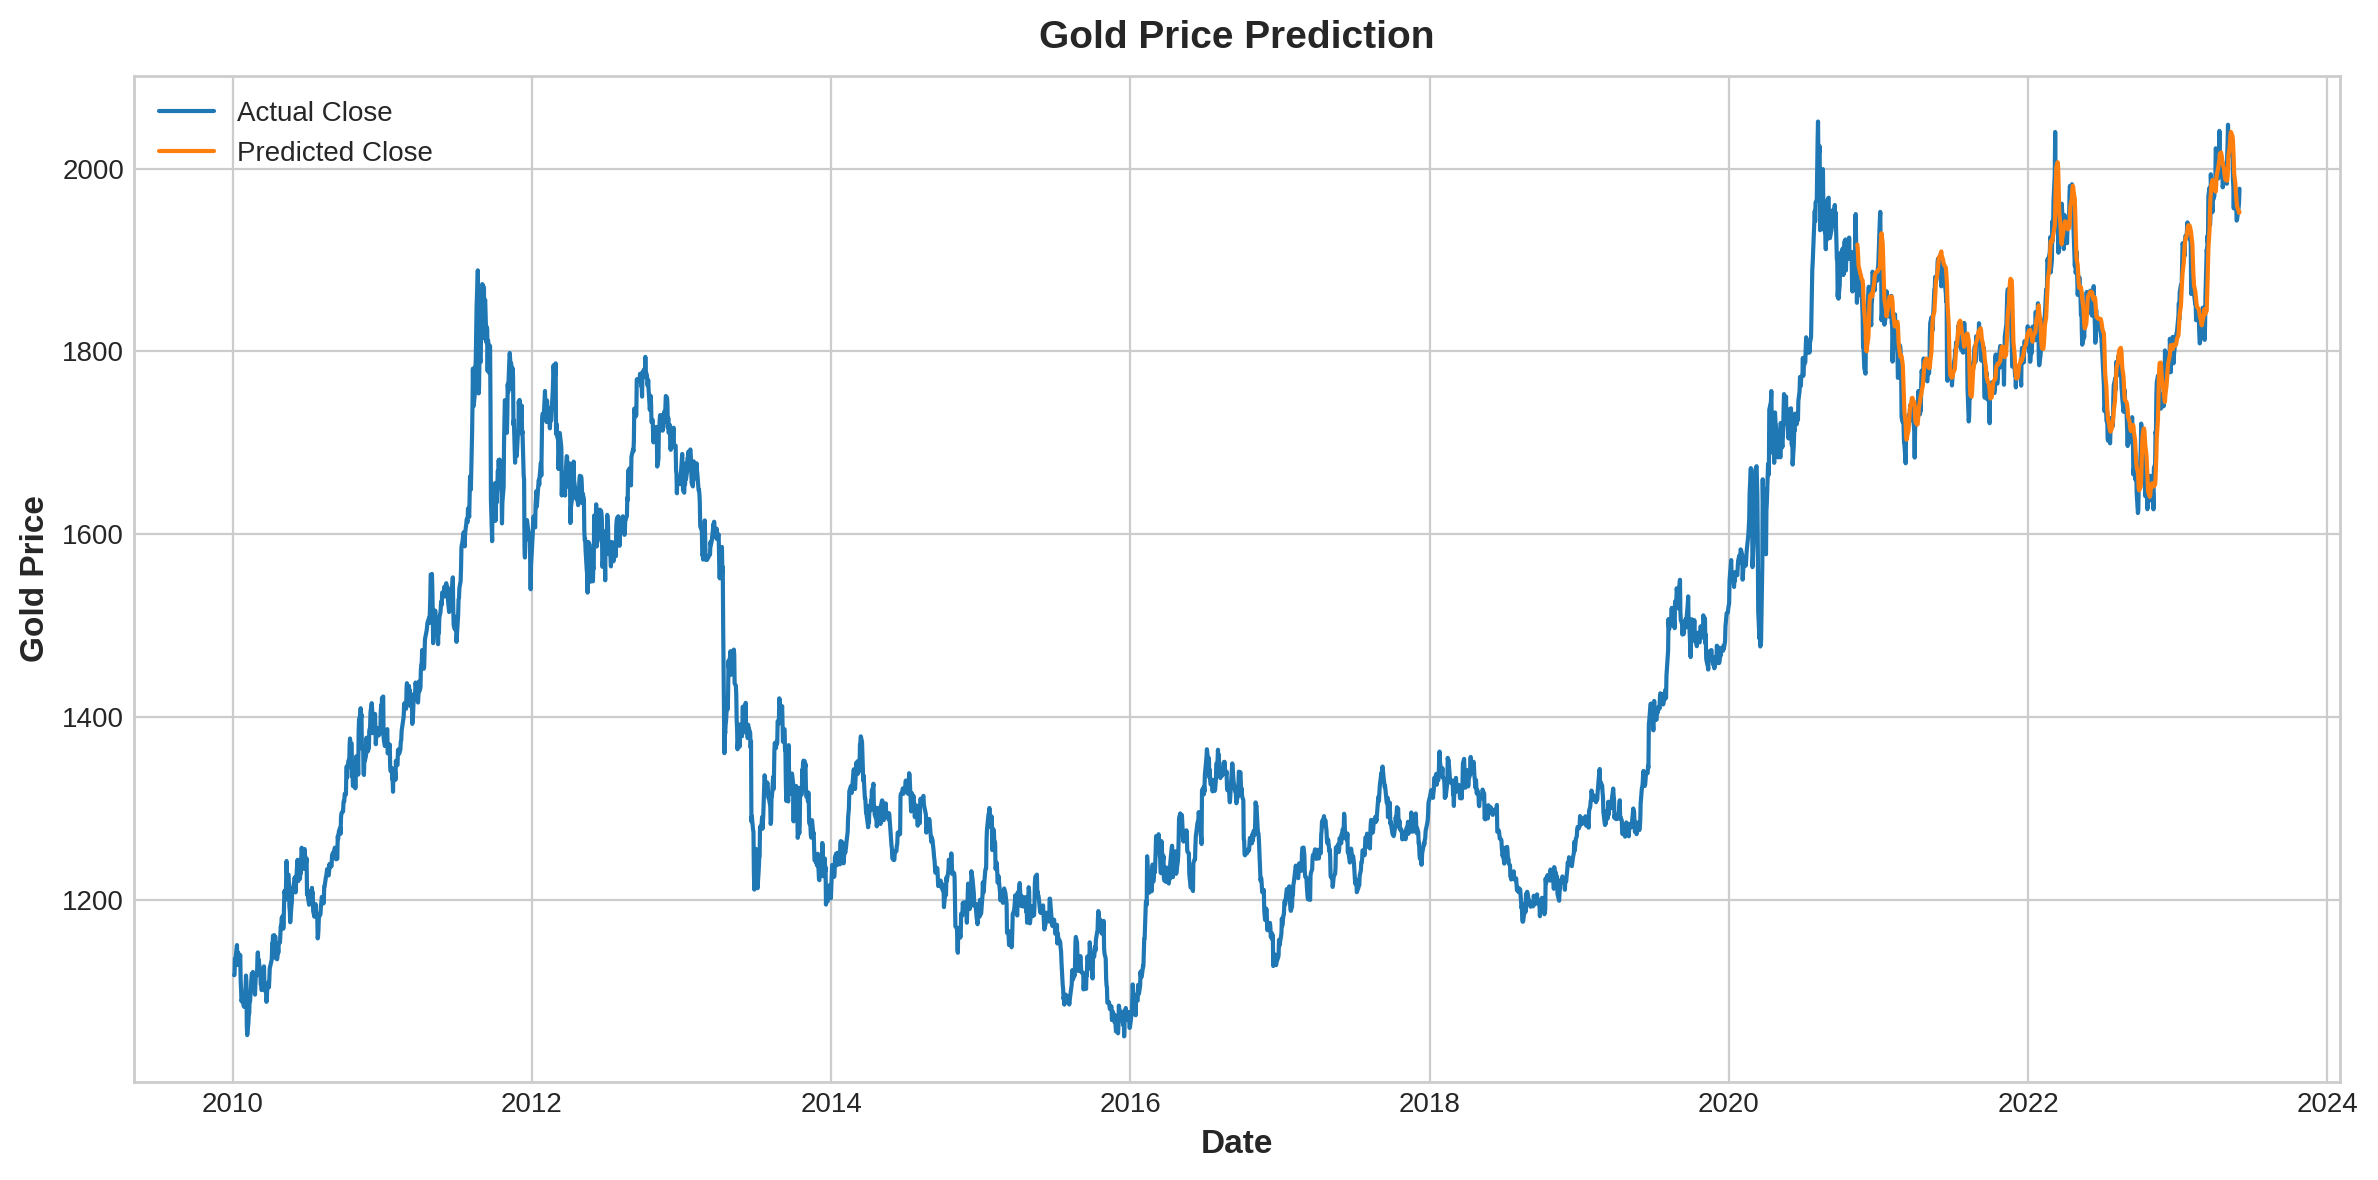

In [ ]:

prices = g_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# Split the data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Define the number of previous time steps to use for prediction
n_steps = 30

# Prepare the training data
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i-n_steps:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the test data
X_test, y_test = [], []
for i in range(n_steps, len(test_data)):
    X_test.append(test_data[i-n_steps:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to be 3-dimensional (samples, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test data
predictions = model.predict(X_test)

# Scale the predictions back to the original range
predictions = scaler.inverse_transform(predictions)

# Calculate Mean Squared Error (MSE) accuracy
mse = mean_squared_error(y_test, predictions)
mse_accuracy = -mse  # Negative value for better interpretation

print("MSE Accuracy:", mse_accuracy)

# Plot the predicted prices
test_dates = g_data.index[train_size+n_steps:]
predicted_prices = pd.DataFrame({'Date': test_dates, 'Predicted Close': predictions.flatten()})

plt.figure(figsize=(12, 6))
plt.plot(g_data.index, prices, label='Actual Close')
plt.plot(predicted_prices['Date'], predicted_prices['Predicted Close'], label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()


In [ ]:
predicted_prices

,Date,Predicted Close
0,2020-11-10,1916.977051
1,2020-11-11,1912.312256
2,2020-11-12,1902.841431
3,2020-11-13,1893.749512
4,2020-11-16,1888.027588
...,...,...
640,2023-05-25,1964.785278
641,2023-05-26,1958.851685
642,2023-05-30,1953.472778
643,2023-05-31,1951.544556
